# Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data

In [2]:
delivery_data = pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Data Understanding

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
delivery_data.dtypes #As the datatypes of both the columns are different, we need to make them same.

Delivery Time    float64
Sorting Time       int64
dtype: object

In [7]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Data Transformation

In [8]:
delivery_data['Sorting Time'] = delivery_data['Sorting Time'].astype(float)

In [9]:
delivery_data

,Delivery Time,Sorting Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [10]:
delivery_data.rename(columns = {'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'}, inplace = True)

In [11]:
delivery_data

,Delivery_Time,Sorting_Time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


In [12]:
delivery_data.dtypes

Delivery_Time    float64
Sorting_Time     float64
dtype: object

Now both the columns have the same datatypes so we can proceed further.

# Assumptions Checking

In this problem we have to predict the delivery time based on sorting time. So our input which is x will be sorting time and output y will be delivery time.

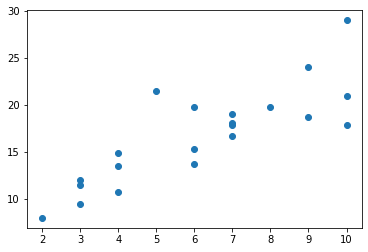

In [14]:
plt.scatter(x = 'Sorting_Time',y = 'Delivery_Time', data = delivery_data)

In [15]:
delivery_data.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000



## 5. Model Building and Model Training

Linear regression can be build using 2 libraries:

* statsmodels
* sklearn

In [16]:
import statsmodels.formula.api as sfa

In [17]:
#Building linear regression using ordinary least square technique
linear_model = sfa.ols('Delivery_Time~Sorting_Time',data = delivery_data).fit()
linear_model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
train_data = delivery_data[['Sorting_Time']]
train_data

,Sorting_Time
0,10.0
1,4.0
2,6.0
3,9.0
4,10.0
5,6.0
6,7.0
7,3.0
8,10.0
9,9.0


In [19]:
linear_model.predict(train_data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

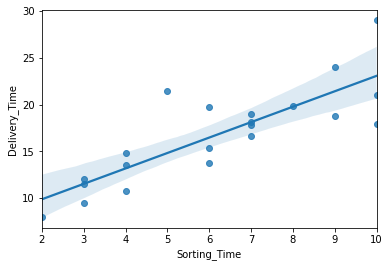

In [20]:
sns.regplot(x = 'Sorting_Time', y = 'Delivery_Time', data = delivery_data)

## 7. Model Evaluation

In [21]:
linear_model.aic,linear_model.rsquared

(106.71400170798609, 0.6822714748417231)

## 8. Model deployement

In [22]:
from pickle import dump

In [23]:
dump(linear_model,open('linear_model.pkl','wb')) #Serialzation

In [24]:
from pickle import load

In [25]:
loaded_model = load(open('linear_model.pkl','rb')) #Deserialzation

In [26]:
loaded_model.predict(delivery_data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64